In [5]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import graphviz

matplotlib.rc('font',family='Malgun Gothic')
matplotlib.rc('font',family='NanumGothic')

import os
os.environ["PATH"]+=os.pathsep +os.pathsep+"C:/Program Files (x86)/Graphviz2.38/bin/"

# 데이터 불러오기

In [6]:
df_raw = pd.read_csv("D:\Study\새 폴더\Big Data 분석\Concrete.csv",encoding="euc_kr",engine="python")
df_raw

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


# 데이터 구성하기(변수 역할 지정)

In [7]:
df_raw_y=df_raw["CONCRETE_COMPRESSIVE_STRENGTH"]
df_raw_x=df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH",axis=1,inplace=False)

In [8]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
# print("Validation data X size : {}".format(df_validation_x.shape))
# print("Validation data Y size : {}".format(df_validation_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (721, 8)
train data Y size : (721,)
test data X size : (309, 8)
test data Y size : (309,)


In [9]:
df_train_x,df_validation_x,df_train_y,df_validation_y=train_test_split(df_train_x,df_train_y,test_size=0.428,random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("Validation data X size : {}".format(df_validation_x.shape))
print("Validation data Y size : {}".format(df_validation_y.shape))

train data X size : (412, 8)
train data Y size : (412,)
Validation data X size : (309, 8)
Validation data Y size : (309,)


- train 데이터 412건, validation 데이터 309건, test 데이터 309건

In [10]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)

print("Score on training set:{:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Score on validation set:{:.3f}".format(rf_uncustomized.score(df_validation_x,df_validation_y)))

Score on training set:0.975
Score on validation set:0.793


c:\users\cross\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


- validation의 설명력이 낮음 : 과대적합

In [11]:
rf_uncustomized

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

# 모델 parameter 조정

### n_estimators:트리의 수 변경에 따른 모델 성능

In [15]:
train_score=[];validation_score=[]
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators=v_n_estimators,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_validation_x,df_validation_y))
    
df_score_n=pd.DataFrame()
df_score_n["n_estimators"]=para_n_tree
df_score_n["TrainScore"]=train_score
df_score_n["Validation"]=validation_score

- 모델 설명력 확인

In [16]:
df_score_n.round(3)

,n_estimators,TrainScore,Validation
0,10,0.975,0.793
1,20,0.979,0.809
2,30,0.981,0.809
3,40,0.982,0.815
4,50,0.982,0.813
5,60,0.982,0.816
6,70,0.982,0.817
7,80,0.982,0.815
8,90,0.982,0.819
9,100,0.982,0.820


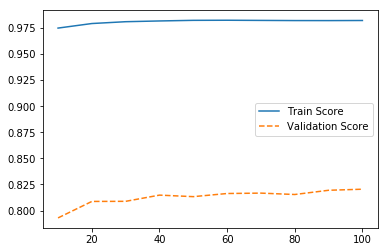

In [17]:
plt.plot(para_n_tree,train_score,linestyle="-",label="Train Score")
plt.plot(para_n_tree,validation_score,linestyle="--",label="Validation Score")
plt.legend()

- 트리의 수가 40개 이후로 설명력의 큰 변화를 보이지 않는다.
- 트리수에 의한 영향을 배제하고자 n_estimators = 100 지정

### min_samples_leaf : 입사귀 노드의 최소자료 수 변경에 따른 모델 성능

In [18]:
train_score=[];validation_score=[]
para_leaf=[n_leaf*1 for n_leaf in range(1,30)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234,n_estimators=100,
                              min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_validation_x,df_validation_y))
    
df_score_leaf=pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]=para_leaf
df_score_leaf["TrainScore"]=train_score
df_score_leaf["Validation"]=validation_score

- 모델 설명력 확인

In [19]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,Validation
0,1,0.982,0.820
1,2,0.969,0.810
2,3,0.952,0.803
3,4,0.936,0.790
4,5,0.922,0.778
5,6,0.908,0.768
6,7,0.895,0.755
7,8,0.882,0.748
8,9,0.870,0.741
9,10,0.862,0.733


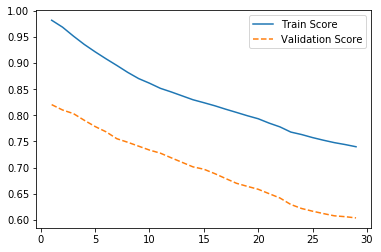

In [20]:
plt.plot(para_leaf,train_score,linestyle="-",label="Train Score")
plt.plot(para_leaf,validation_score,linestyle="--",label="Validation Score")
plt.legend()

- min_samples_leaf = 20개 적절

### min_samples_split: 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [21]:
train_score=[];validation_score=[]
para_split=[n_split*2 for n_split in range(2,51)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234,n_estimators=100,min_samples_leaf=20,
                              min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_validation_x,df_validation_y))
    
df_score_split=pd.DataFrame()
df_score_split["MinSampleSplit"]=para_split
df_score_split["TrainScore"]=train_score
df_score_split["Validation"]=validation_score

In [22]:
df_score_split.round(3)

,MinSampleSplit,TrainScore,Validation
0,4,0.793,0.658
1,6,0.793,0.658
2,8,0.793,0.658
3,10,0.793,0.658
4,12,0.793,0.658
5,14,0.793,0.658
6,16,0.793,0.658
7,18,0.793,0.658
8,20,0.793,0.658
9,22,0.793,0.658


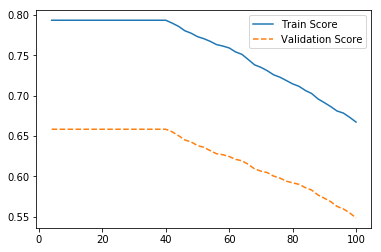

In [23]:
plt.plot(para_split,train_score,linestyle="-",label="Train Score")
plt.plot(para_split,validation_score,linestyle="--",label="Validation Score")
plt.legend()

- min_samples_split = 40개 적절

### max_depth : 최대 깊이 변경에 따른 모델 성능

In [24]:
train_score=[];validation_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234,n_estimators=100,min_samples_leaf=20,min_samples_split=40,
                              max_depth=v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_validation_x,df_validation_y))
    
df_score_depth=pd.DataFrame()
df_score_depth["Depth"]=para_depth
df_score_depth["TrainScore"]=train_score
df_score_depth["Validation"]=validation_score

In [25]:
df_score_depth.round(3)

,Depth,TrainScore,Validation
0,1,0.435,0.324
1,2,0.648,0.513
2,3,0.740,0.601
3,4,0.782,0.646
4,5,0.793,0.658
5,6,0.793,0.658
6,7,0.793,0.658
7,8,0.793,0.658
8,9,0.793,0.658
9,10,0.793,0.658


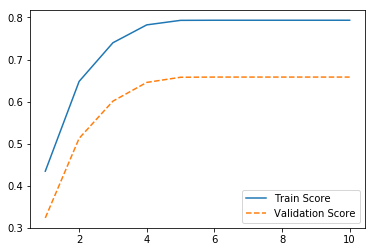

In [26]:
plt.plot(para_depth,train_score,linestyle="-",label="Train Score")
plt.plot(para_depth,validation_score,linestyle="--",label="Validation Score")
plt.legend()

- max_depth = 4개 적절

# 결론도출

### 최종 모델 생성

In [27]:
rf_final = RandomForestRegressor(random_state=1234,n_estimators=100,min_samples_leaf=20,min_samples_split=40,max_depth=4)
rf_final.fit(df_train_x,df_train_y)
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x,df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x,df_test_y)))
rf_final

Score on training set: 0.782
Score on test set: 0.712


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=20, min_samples_split=40,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

### 최종 모델 시각화(생성되는 트리 중 3개 직접 확인)

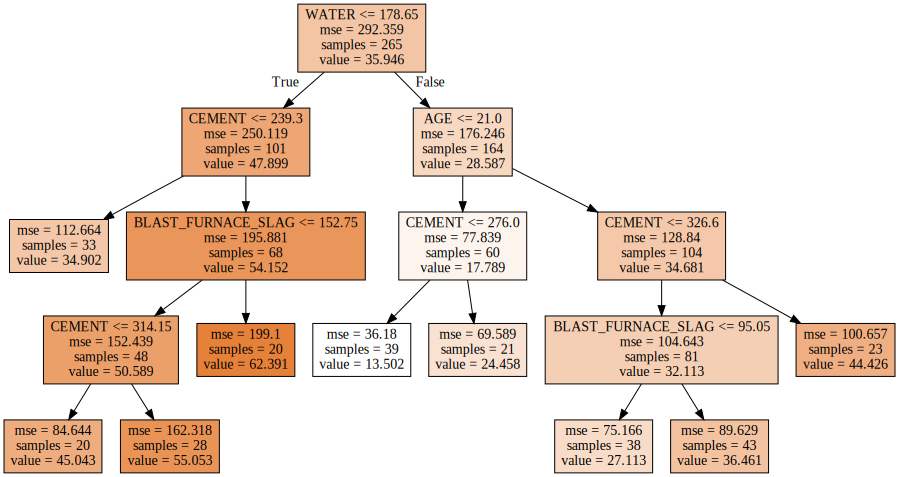

In [28]:
v_feature_names=df_train_x.columns
export_graphviz(rf_final.estimators_[0],out_file="rfr_final_0.dot",feature_names=v_feature_names,impurity=True,filled=True)
with open("rfr_final_0.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

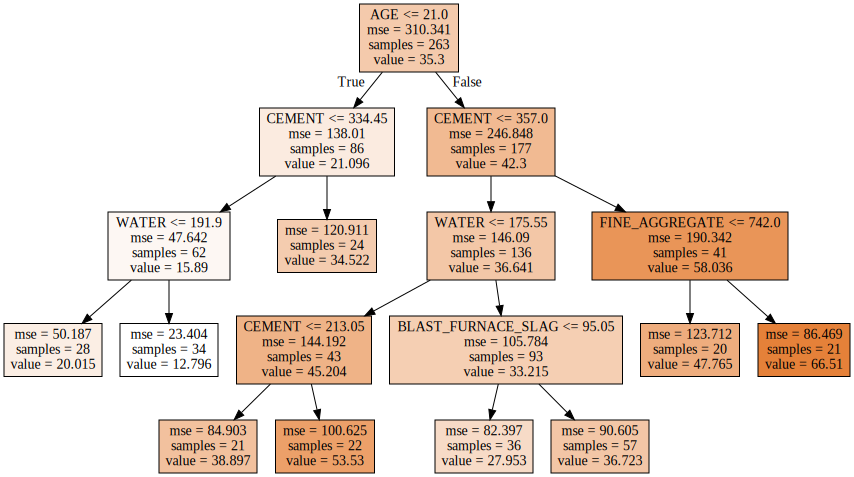

In [29]:
export_graphviz(rf_final.estimators_[1],out_file="rfr_final_1.dot",feature_names=v_feature_names,impurity=True,filled=True)
with open("rfr_final_1.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

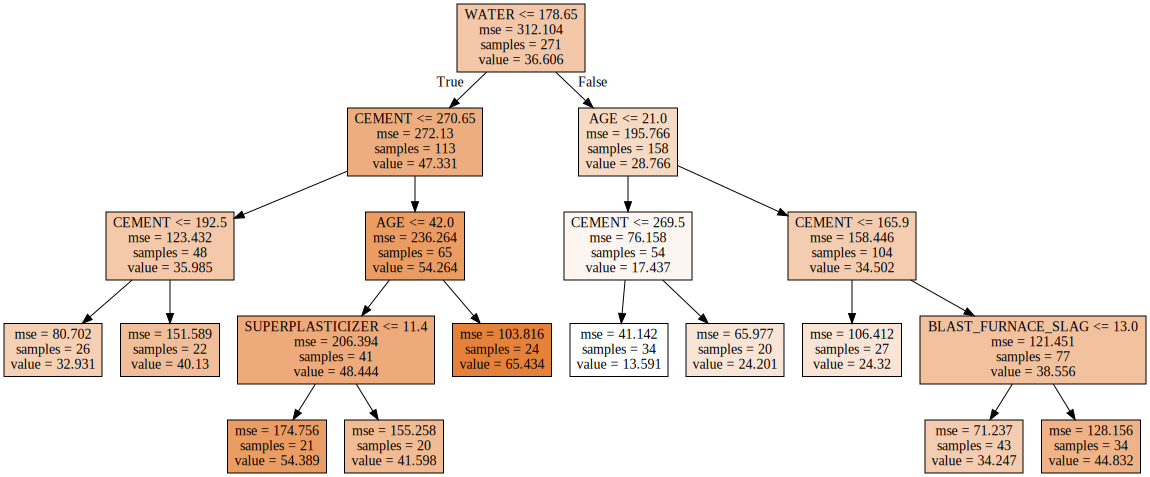

In [30]:
export_graphviz(rf_final.estimators_[10],out_file="rfr_final_10.dot",feature_names=v_feature_names,impurity=True,filled=True)
with open("rfr_final_10.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

- 위와 같은 트리 100개(n_extimators=100 으로 지정)를 조합하여 최종모델이 생성됨

### feature_importances_:설명변수의 중요도

In [31]:
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_names
df_importance["Importance"]=rf_final.feature_importances_

df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.345
0,CEMENT,0.322
3,WATER,0.273
1,BLAST_FURNACE_SLAG,0.022
4,SUPERPLASTICIZER,0.017
6,FINE_AGGREGATE,0.011
2,FLY_ASH,0.006
5,COARSE_AGGREGATE,0.005


Text(0, 0.5, '변수')

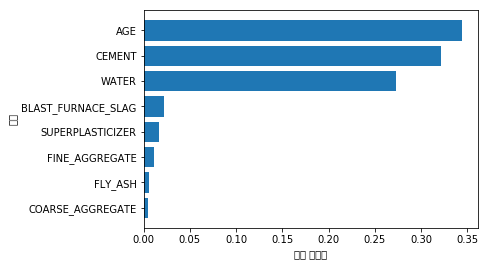

In [32]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

- AGE 가 가장 유의한 변수로 확인됨.

In [56]:
estimator = RandomForestRegressor()

param_grid={"criterion":["mse","friedman_mse","mae"],"max_features":["auto","sqrt","log2"],"max_depth":para_depth,"min_samples_split":para_split,"min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator,param_grid,scoring="r2",n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print("best estimator model:\n{}".format(grid_dt.best_estimator_))
print("\nbest parameter:\n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))


c:\users\cross\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\cross\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best estimator model:
DecisionTreeRegressor(criterion='mae', max_depth=9, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

best parameter:
{'criterion': 'mae', 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}

best score:
0.779


- mae 값은 max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6

- GridSearchCV에서는 mae 기준에서 최적 모델 도출 (mse 결과와 상이함)

# 결론

- predict() 함수를 이용한 test set의 예측값 도출

In [33]:
pred = rf_final.predict(df_test_x)
print(pred)

[28.20135321 17.3552998  46.35293355 26.85706263 42.59195263 40.08820013
 35.64450233 31.09046145 43.49571784 60.54329593 12.87418116 29.66939851
 38.6297702  28.76927253 41.81809009 42.68922701 37.68529715 25.20636354
 32.45233071 13.19363662 43.01827007 31.1178861  35.88626232 28.46637869
 42.83190883 37.67164587 32.41762108 27.53146193 29.19809618 30.05884263
 42.18952628 29.14861521 36.58435535 42.80874833 38.32344736 20.1152482
 18.03524706 35.83987907 28.0278176  28.13472731 16.40135927 41.81809009
 29.17371509 25.51683426 34.79012047 28.58394453 35.83987907 28.29334413
 43.49571784 24.54920581 44.08336054 26.3611663  44.51427934 46.1879991
 52.01712225 58.51720956 37.00315161 41.8895816  30.96145241 33.65917103
 58.62589611 27.14755839 38.96861232 14.53470688 42.36786428 36.17321763
 62.10862753 60.2706021  28.97558064 38.19766855 37.19017788 24.05965111
 42.80246572 31.07443275 43.99074037 59.06289643 21.92970098 27.12681384
 32.41762108 60.28873597 37.14286928 40.43774932 34.9

In [34]:
mean_squared_error(df_test_y,pred,multioutput='raw_values')

array([74.94051456])

In [35]:
mean_absolute_error(df_test_y,pred,multioutput='raw_values')

array([7.07471119])

- mse 값은 74.940 이다.
- mae 값은 7.074 이다
